<a href="https://colab.research.google.com/github/yassinekerboubi/Construire-un-classificateur-pour-classer-les-pages-web-en-tant-que-pages-p-rennes-ou-non/blob/main/Construire%20un%20classificateur%20pour%20classer%20les%20pages%20web%20en%20tant%20que%20pages%20p%C3%A9rennes%20ou%20non.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data analysis**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

<ipython-input-4-08dd3a4481d3>:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [ ]:
!ls

raw_content.zip  sample_data  sampleSubmission.csv  test.tsv  train.tsv


In [ ]:


# Lire le fichier en sautant les lignes mal formées
raw_df = pd.read_csv('train.tsv', sep='\t', on_bad_lines='skip')
df = raw_df.copy()
del df['framebased']
del df['urlid']
del df['alchemy_category_score']
df['is_news'] = df['is_news'].str.replace('?','0').astype(int)





In [ ]:
 df['is_news'].sample(5, random_state=0)

,is_news
4646,0
3110,0
467,0
526,1
2194,1


In [ ]:
df.sample(5)

,url,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
1453,http://techcrunch.com/2013/04/18/larry-page-sa...,"{""url"":""techcrunch 2013 04 18 larry page says ...",computer_internet,0.789028,3.012987,0.527607,0.220859,0.147239,0.079755,0.388175,...,1,1,51,0,2180,163,7,0.276074,0.122507,0
535,http://www.fitsugar.com/3-Ways-Improve-Bad-Pos...,"{""title"":""3 Ways to Improve Bad Posture stop s...",health,0.285445,2.235602,0.435000,0.125000,0.055000,0.020000,0.413644,...,1,1,36,0,3511,200,4,0.380000,0.118859,0
2976,http://techcrunch.com/2012/06/14/carat-battery/,"{""title"":""Carat The Brilliant App That Increas...",science_technology,0.161159,3.060606,0.517544,0.175439,0.052632,0.008772,0.485920,...,1,1,28,0,3766,114,2,0.192982,0.100813,0
1666,http://ireport.cnn.com/docs/DOC-929213,"{""url"":""ireport cnn docs DOC 929213"",""title"":""...",business,0.761692,1.917355,0.476510,0.147651,0.013423,0.006711,0.499751,...,1,1,25,0,3330,149,2,0.201342,0.072222,0
3740,http://www.sharonblog.com/reeses-cheesecake-re...,"{""title"":""Reese s Cheesecake Recipe Life With ...",arts_entertainment,0.631121,2.097744,0.580882,0.227941,0.191176,0.183824,0.452956,...,1,1,21,0,4642,136,3,0.183824,0.084746,1


In [ ]:
df.sample(2).T

,3721,2571
url,http://www.vogue.com/parties/tim-burton-exhibi...,http://www.epicurious.com/recipes/food/views/C...
boilerplate,"{""title"":""Weekend Wonderland Parties Vogue wee...","{""title"":""Chocolate Brownie Cookies Recipe at ..."
alchemy_category,?,recreation
alchemy_category_score,?,0.589469
avglinksize,2.191176,2.470899
commonlinkratio_1,0.403727,0.535088
commonlinkratio_2,0.161491,0.258772
commonlinkratio_3,0.111801,0.04386
commonlinkratio_4,0.043478,0.02193
compression_ratio,0.536715,0.571429


In [ ]:
df.iloc[0]

,0
url,http://www.bloomberg.com/news/2010-12-23/ibm-p...
boilerplate,"{""title"":""IBM Sees Holographic Calls Air Breat..."
alchemy_category,business
alchemy_category_score,0.789131
avglinksize,2.055556
commonlinkratio_1,0.676471
commonlinkratio_2,0.205882
commonlinkratio_3,0.047059
commonlinkratio_4,0.023529
compression_ratio,0.443783


In [ ]:
df.alchemy_category.value_counts()

,count
alchemy_category,
?,2342
recreation,1229
arts_entertainment,941
business,880
health,506
sports,380
culture_politics,343
computer_internet,296
science_technology,289


In [ ]:
df.label.head(10)

,label
0,0
1,1
2,1
3,1
4,0
5,0
6,1
7,0
8,1
9,1


In [ ]:
df.label.mean()

0.5133198106828939

In [ ]:
df.groupby('alchemy_category').label.mean()

,label
alchemy_category,
?,0.502135
arts_entertainment,0.371945
business,0.711364
computer_internet,0.246622
culture_politics,0.457726
gaming,0.368421
health,0.573123
law_crime,0.419355
recreation,0.684296


In [ ]:
type(df.groupby('alchemy_category').label.mean())

pandas.core.series.Series

In [ ]:
label_mean_by_category  =  df.groupby('alchemy_category').label.mean().sort_values()
label_mean_by_category

,label
alchemy_category,
weather,0.000000
sports,0.205263
computer_internet,0.246622
unknown,0.333333
gaming,0.368421
arts_entertainment,0.371945
religion,0.416667
law_crime,0.419355
science_technology,0.456747


<Axes: ylabel='alchemy_category'>

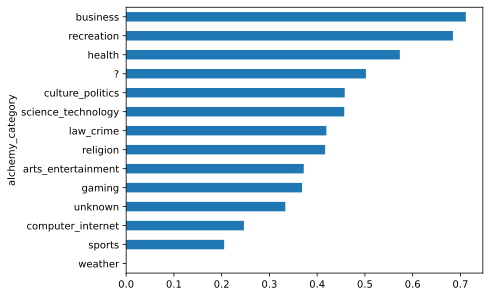

In [ ]:
label_mean_by_category.plot.barh()

In [ ]:
df.groupby('alchemy_category').label.agg(['mean','count']).sort_values('count',ascending=False)

,mean,count
alchemy_category,,
?,0.502135,2342
recreation,0.684296,1229
arts_entertainment,0.371945,941
business,0.711364,880
health,0.573123,506
sports,0.205263,380
culture_politics,0.457726,343
computer_internet,0.246622,296
science_technology,0.456747,289


In [ ]:
# Select numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation
numeric_df.corr()

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,html_ratio,image_ratio,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
avglinksize,1.000000,0.120467,0.161769,0.174554,0.134527,-0.003578,0.005254,-0.049270,-0.002046,0.018974,-0.003002,0.020852,0.122550,-0.010982,0.000360,-0.033890,0.006089,0.035393,0.006172
commonlinkratio_1,0.120467,1.000000,0.808047,0.560584,0.388801,-0.017878,0.005280,-0.294860,0.006790,-0.201501,-0.064435,0.421284,0.257200,0.193914,0.317293,0.144354,-0.078026,-0.035019,0.083364
commonlinkratio_2,0.161769,0.808047,1.000000,0.758330,0.555148,-0.032460,0.019387,-0.259222,0.000263,-0.159702,-0.044663,0.398817,0.257594,0.177785,0.311492,0.096940,-0.079485,-0.027888,0.083488
commonlinkratio_3,0.174554,0.560584,0.758330,1.000000,0.850604,-0.016188,0.007578,-0.218559,-0.031097,-0.133370,-0.050357,0.363159,0.109654,0.264022,0.283924,0.049203,-0.008652,-0.008599,0.105964
commonlinkratio_4,0.134527,0.388801,0.555148,0.850604,1.000000,-0.020415,0.005473,-0.178064,-0.052519,-0.136561,-0.038071,0.287159,0.059223,0.162883,0.233898,0.026384,0.036387,-0.013507,0.080464
compression_ratio,-0.003578,-0.017878,-0.032460,-0.016188,-0.020415,1.000000,-0.889345,0.159335,0.027657,0.106335,-0.188976,-0.090325,0.146470,-0.064163,-0.055388,-0.042614,-0.033772,0.364122,-0.059737
embed_ratio,0.005254,0.005280,0.019387,0.007578,0.005473,-0.889345,1.000000,-0.130753,-0.026473,-0.090938,0.183808,0.075322,-0.108476,0.046484,0.042942,0.043343,0.037361,-0.342206,0.039536
frameTagRatio,-0.049270,-0.294860,-0.259222,-0.218559,-0.178064,0.159335,-0.130753,1.000000,0.010193,0.384937,-0.088847,-0.196673,0.158874,-0.303682,-0.362491,0.049330,-0.094557,0.033663,-0.187762
hasDomainLink,-0.002046,0.006790,0.000263,-0.031097,-0.052519,0.027657,-0.026473,0.010193,1.000000,0.009665,-0.003890,0.008579,0.022583,-0.017361,0.013678,0.058085,0.051330,0.008718,-0.004863
html_ratio,0.018974,-0.201501,-0.159702,-0.133370,-0.136561,0.106335,-0.090938,0.384937,0.009665,1.000000,-0.172924,-0.215809,-0.141363,-0.136550,-0.455636,-0.042001,-0.183350,0.013860,-0.051149


<Axes: >

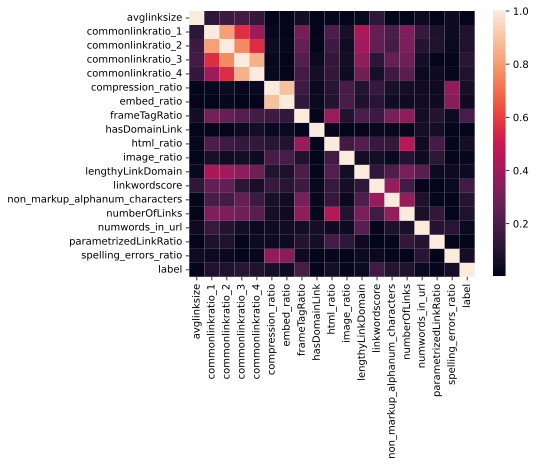

In [ ]:
import seaborn as sns
sns.heatmap(numeric_df.corr().abs())


In [ ]:
numeric_df.label.value_counts()

,count
label,
1,3796
0,3599


In [ ]:
numeric_df.linkwordscore.value_counts()

,count
linkwordscore,
19,200
16,198
13,197
18,189
17,184
...,...
98,3
97,3
99,3


<Axes: >

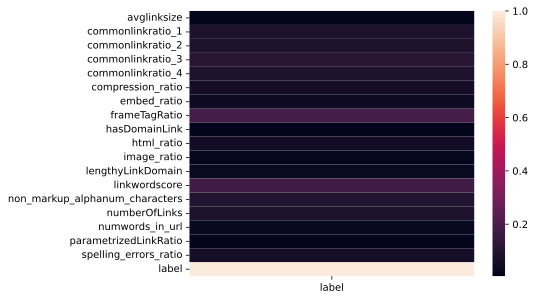

In [ ]:
import seaborn as sns
sns.heatmap(numeric_df.corr().abs()[['label']])


<Axes: >

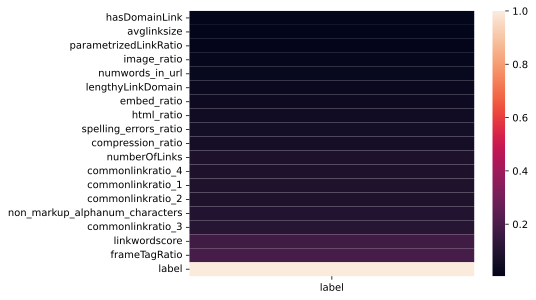

In [ ]:
import seaborn as sns
sns.heatmap(numeric_df.corr().abs()[['label']].sort_values('label'))

<Axes: xlabel='label', ylabel='frameTagRatio'>

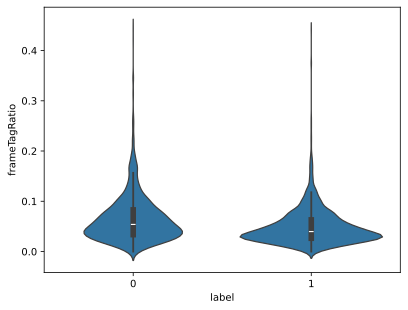

In [ ]:
sns.violinplot(x='label', y='frameTagRatio', data=df)

<Axes: xlabel='label', ylabel='linkwordscore'>

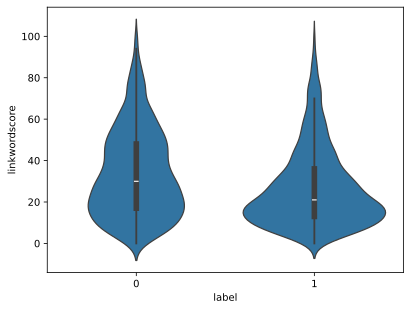

In [ ]:
sns.violinplot(x='label', y='linkwordscore', data=df)

In [ ]:
df.select_dtypes(np.number)

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,html_ratio,image_ratio,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0.090774,0,0.245831,0.003883,1,24,5424,170,8,0.152941,0.079130,0
1,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,0.098707,0,0.203490,0.088652,1,40,4973,187,9,0.181818,0.125448,1
2,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.0,0.072448,0,0.226402,0.120536,1,55,2240,258,11,0.166667,0.057613,1
3,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.0,0.095861,0,0.265656,0.035343,0,24,2737,120,5,0.041667,0.100858,1
4,2.676471,0.500000,0.222222,0.123457,0.043210,0.446143,0.0,0.024908,0,0.228887,0.050473,1,14,12032,162,10,0.098765,0.082569,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,3.010526,0.474747,0.222222,0.191919,0.191919,0.474273,0.0,0.177043,0,0.256669,0.048780,1,38,2219,99,11,0.040404,0.071429,0
7391,2.208054,0.483333,0.246667,0.036667,0.026667,0.558184,0.0,0.057377,0,0.218014,0.225962,1,34,5672,300,4,0.020000,0.109453,0
7392,2.000000,0.315789,0.171053,0.105263,0.052632,0.692529,0.0,0.124122,0,0.248388,0.464286,1,43,848,76,5,0.434211,0.117647,1
7393,1.026316,0.210526,0.052632,0.000000,0.000000,21.000000,-1.0,0.097778,0,0.256070,-1.000000,0,37,386,38,0,0.026316,0.333333,1


In [ ]:
features_df=df.drop('label',axis=1)
num_features = df.select_dtypes(np.number)

In [ ]:
num_features.columns

Index(['avglinksize', 'commonlinkratio_1', 'commonlinkratio_2',
       'commonlinkratio_3', 'commonlinkratio_4', 'compression_ratio',
       'embed_ratio', 'frameTagRatio', 'hasDomainLink', 'html_ratio',
       'image_ratio', 'lengthyLinkDomain', 'linkwordscore',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio', 'label'],
      dtype='object')

In [ ]:
num_features.hasDomainLink.value_counts()

,count
hasDomainLink,
0,7238
1,157


In [ ]:
num_features.describe()

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,html_ratio,image_ratio,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
count,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000
mean,2.761823,0.468230,0.214080,0.092062,0.049262,2.255103,-0.103750,0.056423,0.021231,0.233778,0.275709,0.660311,30.077079,5716.598242,178.754564,4.960649,0.172864,0.101221,0.513320
std,8.619793,0.203133,0.146743,0.095978,0.072629,5.704313,0.306545,0.041446,0.144162,0.052487,1.919320,0.473636,20.393101,8875.432430,179.466198,3.233111,0.183286,0.079231,0.499856
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.045564,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.602062,0.340370,0.105263,0.022222,0.000000,0.442616,0.000000,0.028502,0.000000,0.201061,0.025900,0.000000,14.000000,1579.000000,82.000000,3.000000,0.040984,0.068739,0.000000
50%,2.088235,0.481481,0.202454,0.068627,0.022222,0.483680,0.000000,0.045775,0.000000,0.230564,0.083051,1.000000,25.000000,3500.000000,139.000000,5.000000,0.113402,0.089312,1.000000
75%,2.627451,0.616604,0.300000,0.133333,0.065065,0.578227,0.000000,0.073459,0.000000,0.260770,0.236700,1.000000,43.000000,6377.000000,222.000000,7.000000,0.241299,0.112376,1.000000
max,363.000000,1.000000,1.000000,0.980392,0.980392,21.000000,0.250000,0.444444,1.000000,0.716883,113.333333,1.000000,100.000000,207952.000000,4997.000000,22.000000,1.000000,1.000000,1.000000


<Axes: ylabel='Frequency'>

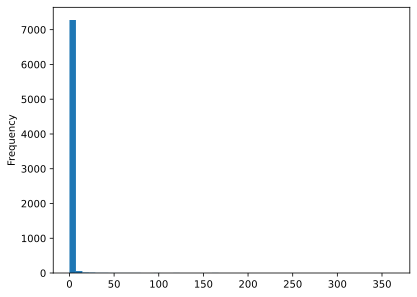

In [ ]:
num_features.avglinksize.plot.hist(bins=50)

<Axes: ylabel='Frequency'>

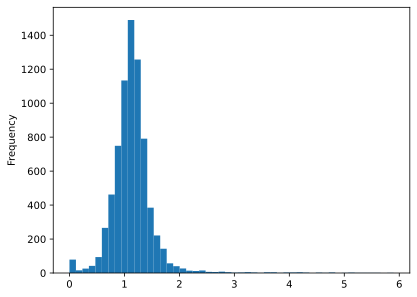

In [ ]:
num_features.avglinksize.apply(np.log1p).plot.hist(bins=50)

In [ ]:
values = num_features.avglinksize
values[values < values.quantile(.95)]

,avglinksize
0,2.055556
1,3.677966
2,2.382883
3,1.543103
4,2.676471
...,...
7390,3.010526
7391,2.208054
7392,2.000000
7393,1.026316


<Axes: ylabel='Frequency'>

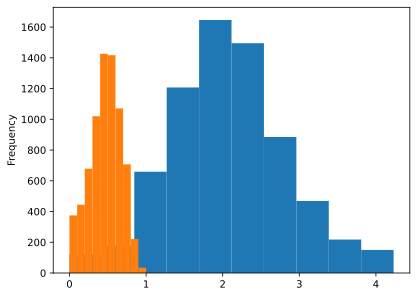

In [ ]:
values = num_features.avglinksize
values[values < values.quantile(.95)].plot.hist()
num_features.commonlinkratio_1.plot.hist()

<Axes: ylabel='Frequency'>

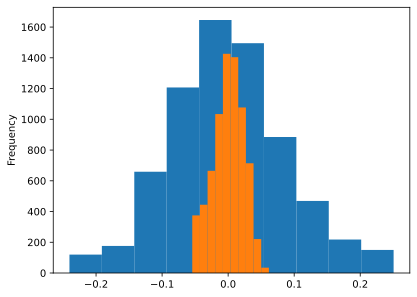

In [ ]:
values_1 = num_features.avglinksize
values_1 = values_1[values_1 < values_1.quantile(.95)]
values_2 = num_features.commonlinkratio_1

values_1 = (values_1 - values_1.mean()) / values.std()
values_2 = (values_2 - values_2.mean()) / values.std()


values_1.plot.hist()
values_2.plot.hist()

In [ ]:
np.mean(values_1)

2.187257887660095e-17

In [ ]:
round(np.mean(values_1),2)

0.0

In [ ]:
round(np.std(values_1),2)

0.09

In [ ]:
cat_features = df.select_dtypes(include=['object'])
cat_features = cat_features[['alchemy_category','news_front_page']]
cat_features.head(5)



,alchemy_category,news_front_page
0,business,0
1,recreation,0
2,health,0
3,health,0
4,sports,0


In [ ]:
pd.get_dummies(cat_features).head(5)

,alchemy_category_?,alchemy_category_arts_entertainment,alchemy_category_business,alchemy_category_computer_internet,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather,news_front_page_0,news_front_page_1,news_front_page_?
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False


In [ ]:
df.alchemy_category_score.value_counts()

,count
alchemy_category_score,
?,2342
0.85,82
0.0784091,40
0.849999,12
0.535009,10
...,...
0.776397,1
0.351398,1
0.642615,1


In [ ]:
df[df.alchemy_category_score != '?'].alchemy_category_score.astype(float).value_counts()

,count
alchemy_category_score,
0.850000,82
0.078409,40
0.849999,12
0.535009,10
0.706770,9
...,...
0.776397,1
0.351398,1
0.642615,1


<Axes: ylabel='Frequency'>

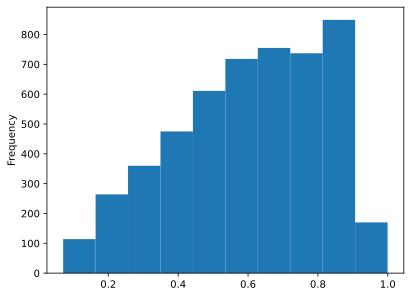

In [ ]:
df[df.alchemy_category_score != '?'].alchemy_category_score.astype(float).plot.hist()

In [ ]:
df.is_news.value_counts()

,count
is_news,
1,4552
?,2843


In [ ]:
df.news_front_page.value_counts()

,count
news_front_page,
0,5853
?,1248
1,294


In [ ]:
cat_features.iloc[0].boilerplate

'{"title":"IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries","body":"A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at the International Business Machines Corp IBM Almaden Research Center campus in the Santa Teresa Hills of San Jose California Photographer Tony Avelar Bloomberg By 2015 your mobile phone will project a 3 D image of anyone who calls and your laptop will be powered by kinetic energy At least that s what International Business Machines Corp sees in its crystal ball The predictions are part of an annual tradition for the Armonk New York based company which surveys its 3 000 researchers to find five ideas expected to take root in the next five years IBM the world s largest provider of computer services looks to Silicon Valley for input gleaning many ideas from its Almaden research center in San Jose

# Model ML

In [ ]:
# More robust way to do feature pre-processing.
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

features_df = df.drop('label', axis=1)
FEATURE_COLUMNS = features_df.columns
NUM_FEATURES = features_df.select_dtypes(include=[np.number]).columns
CAT_FEATURES = ['alchemy_category', 'news_front_page']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)),
    ('scaler', StandardScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('one_hot', OneHotEncoder(handle_unknown='ignore')),
])

preprocessor = ColumnTransformer(
  transformers=[
      ('num', numeric_transformer, NUM_FEATURES),
      ('cat', categorical_transformer, CAT_FEATURES)
  ])

In [ ]:
features_df = preprocessor.fit_transform(df.drop('label', axis=1))
features_df.shape

(7395, 36)

In [ ]:
features_df


array([[-0.08194111,  1.02520913, -0.05586734, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.10629082,  0.19589891,  0.50902122, ...,  1.        ,
         0.        ,  0.        ],
       [-0.04396462,  0.46172309,  0.73347932, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.08838666, -0.75049855, -0.29323563, ...,  1.        ,
         0.        ,  0.        ],
       [-0.20135342, -1.26873084, -1.10028781, ...,  0.        ,
         1.        ,  0.        ],
       [-0.18605119,  0.18553935,  1.46466303, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
features_df.shape

(7395, 36)

In [ ]:
features_df.describe()

,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,html_ratio,...,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather,news_front_page_0,news_front_page_1,news_front_page_?
count,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,...,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000
mean,2.158184,7.205570,7.238067,8.167602,8.031631,1.533742,-0.530930,30.180749,0.748246,76.186572,...,0.878511,0.472508,0.821132,0.676301,0.639957,0.944500,0.954423,1.690294,0.674093,0.470519
std,8.619793,0.203133,0.146743,0.095978,0.072629,5.704313,0.306545,0.041446,0.144162,0.052487,...,0.064614,0.372279,0.098198,0.193800,0.220799,0.028475,0.023253,0.406277,0.195400,0.374567
min,-0.603639,6.737340,7.023987,8.075540,7.982369,-0.721362,-1.427180,30.124326,0.727015,75.998358,...,0.874319,0.306314,0.811396,0.637221,0.588571,0.943689,0.953882,0.898813,0.634337,0.301756
25%,0.998423,7.077710,7.129250,8.097762,7.982369,-0.278746,-0.427180,30.152828,0.727015,76.153855,...,0.874319,0.306314,0.811396,0.637221,0.588571,0.943689,0.953882,1.898813,0.634337,0.301756
50%,1.484596,7.218821,7.226441,8.144167,8.004591,-0.237682,-0.427180,30.170101,0.727015,76.183358,...,0.874319,0.306314,0.811396,0.637221,0.588571,0.943689,0.953882,1.898813,0.634337,0.301756
75%,2.023812,7.353944,7.323987,8.208873,8.047433,-0.143135,-0.427180,30.197785,0.727015,76.213563,...,0.874319,0.306314,0.811396,0.637221,0.588571,0.943689,0.953882,1.898813,0.634337,0.301756
max,362.396361,7.737340,8.023987,9.055932,8.962761,20.278638,-0.177180,30.568771,1.727015,76.669677,...,1.874319,1.306314,1.811396,1.637221,1.588571,1.943689,1.953882,1.898813,1.634337,1.301756


In [ ]:
target = df['label']
target.shape

(7395,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, target, test_size=0.25)

In [ ]:
x_train.shape

(5546, 36)

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

baseline = DummyClassifier(strategy='most_frequent')
#model = LogisticRegressionCV()
model = RandomForestClassifier()

In [ ]:
baseline.fit(x_train, y_train)
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
model.predict(x_test).mean()

0.49972958355868036

In [ ]:
y_train.mean()

0.5131626397403534

In [ ]:
from sklearn.metrics import classification_report
baseline_predictions = baseline.predict(x_test)
model_predictions = model.predict(x_test)


In [ ]:
print(classification_report(y_test, baseline_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       899
           1       0.51      1.00      0.68       950

    accuracy                           0.51      1849
   macro avg       0.26      0.50      0.34      1849
weighted avg       0.26      0.51      0.35      1849



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test, model_predictions))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69       899
           1       0.71      0.69      0.70       950

    accuracy                           0.69      1849
   macro avg       0.69      0.69      0.69      1849
weighted avg       0.69      0.69      0.69      1849



# Submission

In [ ]:
test_df = pd.read_csv('test.tsv', sep='\t')
test_df['is_news'] = test_df['is_news'].str.replace('?','0').astype(int)

In [ ]:
test_df[df.drop('label', axis=1).columns].shape

(3171, 23)

In [ ]:
len(df.drop('label', axis=1).columns)

23

In [ ]:
sub_model = RandomForestClassifier()
sub_model.fit(features_df, target)


RandomForestClassifier()

In [ ]:
test_features = preprocessor.transform(test_df[df.drop('label', axis=1).columns])
predictions = sub_model.predict(test_features)



In [ ]:
sub_df = pd.DataFrame({'urlid' : test_df.urlid, 'label': predictions})
sub_df.head()

,urlid,label
0,5865,1
1,782,0
2,6962,0
3,7640,0
4,3589,0


In [ ]:
sub_df.to_csv('submission.csv', index=False)